In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import os

from torchvision.models import ResNet18_Weights, resnet18
from tqdm.notebook import tqdm
from torchvision import datasets, transforms

from src.imagenet_x.evaluate import ImageNetX, get_vanilla_transform
from src.imagenet_x import FACTORS, plots
from src.imagenet_x import get_factor_accuracies, error_ratio
from src.imagenet_x.utils import load_model_predictions, get_annotation_path

import pickle
from pathlib import Path

/home/juliu/anaconda3/envs/bach/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [45]:
get_annotation_path()

PosixPath('/home/juliu/OneDrive/DTU/Bachelor/bachelor_project/src/imagenet_x/annotations')

In [14]:
dfRes = pd.read_csv('Predictions/resnet18.csv')

In [17]:
dfnames= dfRes['file_name']

In [24]:
dfDino = pd.read_csv('Predictions/Dino.csv').merge(dfnames,on='file_name', how='inner')
dfDino.to_csv('Predictions/MDino.csv', index=False)

In [28]:
dfSimCLR = pd.read_csv('Predictions/50kSIMCLR.csv').merge(dfnames,on='file_name', how='inner')
dfSimCLR.to_csv('Predictions/MSIMCLR.csv', index=False)

In [29]:
dfVit = pd.read_csv('Predictions/Vit.csv').merge(dfnames,on='file_name', how='inner')
dfVit.to_csv('Predictions/mVit.csv', index=False)

In [41]:
dfFilenames = pd.read_csv('Predictions/filename_label.csv').merge(dfnames,on='file_name', how='inner')

In [43]:
dfFilenames.to_csv('Mfilename_labels.csv')

In [18]:
models, top_1_accs = load_model_predictions('Predictions')

                              predicted_class  predicted_probability
file_name                                                           
ILSVRC2012_val_00000293.JPEG                0               0.442219
ILSVRC2012_val_00002138.JPEG                0               0.905526
ILSVRC2012_val_00003014.JPEG                0               0.869040
ILSVRC2012_val_00006697.JPEG                0               0.880939
ILSVRC2012_val_00007197.JPEG                0               0.710211
...                                       ...                    ...
ILSVRC2012_val_00044368.JPEG              999               0.518687
ILSVRC2012_val_00045266.JPEG              999               0.756837
ILSVRC2012_val_00046353.JPEG              968               0.288451
ILSVRC2012_val_00047144.JPEG              333               0.905629
ILSVRC2012_val_00049174.JPEG              999               0.365880

[48868 rows x 2 columns]
                              predicted_class  predicted_probability
file_nam

In [10]:
top_1_accs

2ViT        0.810428
resnet18    0.696611
SIMCLR      0.678133
Vit         0.369772
Dino        0.768969
dtype: float64

In [19]:
factor_accs = get_factor_accuracies("Predictions/")

                              predicted_class  predicted_probability
file_name                                                           
ILSVRC2012_val_00000293.JPEG                0               0.442219
ILSVRC2012_val_00002138.JPEG                0               0.905526
ILSVRC2012_val_00003014.JPEG                0               0.869040
ILSVRC2012_val_00006697.JPEG                0               0.880939
ILSVRC2012_val_00007197.JPEG                0               0.710211
...                                       ...                    ...
ILSVRC2012_val_00044368.JPEG              999               0.518687
ILSVRC2012_val_00045266.JPEG              999               0.756837
ILSVRC2012_val_00046353.JPEG              968               0.288451
ILSVRC2012_val_00047144.JPEG              333               0.905629
ILSVRC2012_val_00049174.JPEG              999               0.365880

[48868 rows x 2 columns]
                              predicted_class  predicted_probability
file_nam

In [15]:
error_ratio = error_ratio(factor_accs)

TypeError: 'DataFrame' object is not callable

In [16]:
from src.imagenet_x import plots

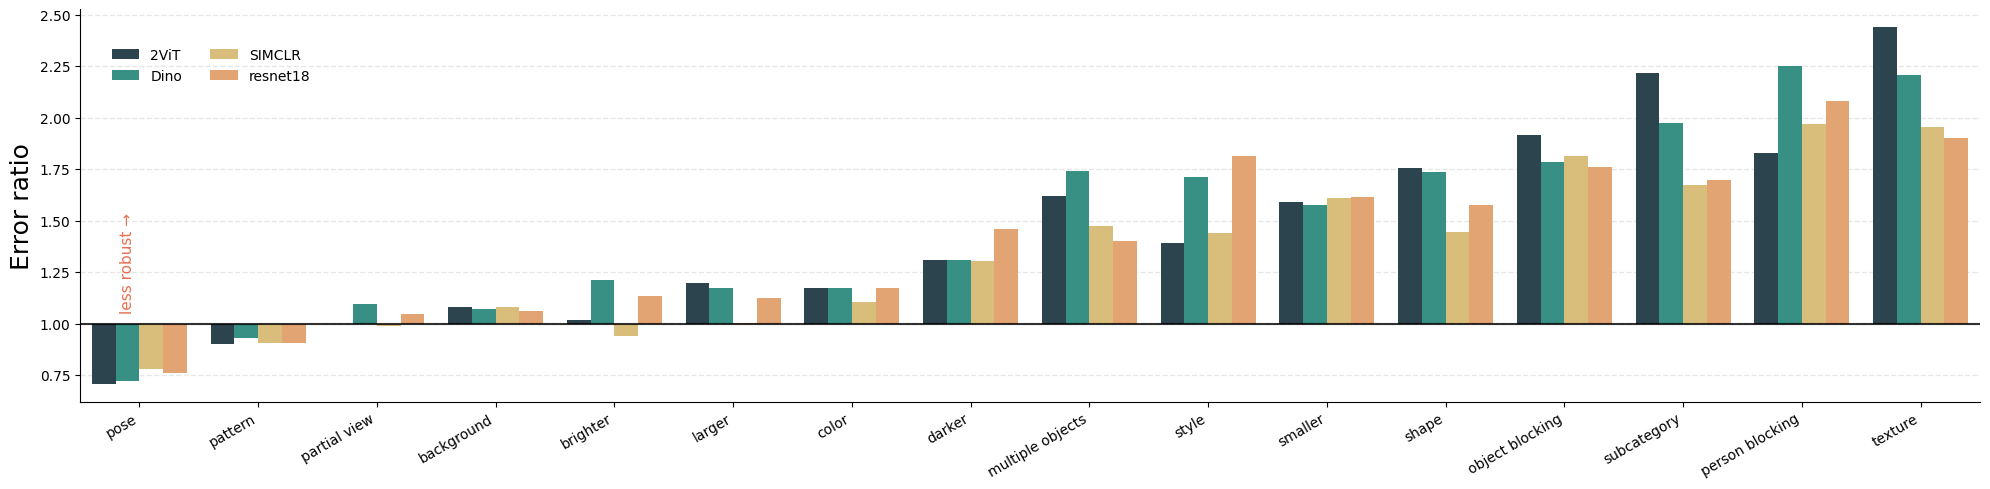

In [20]:
plots.set_color_palette()
plots.model_comparison(factor_accs.reset_index())